Exploratory Data Analysis: Loading and Inspecting NYPD Year-To-Date Complaints Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Read the dataset
df = pd.read_csv('/content/NYPD_Year_To_Date_Complaints.csv')

# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271717 entries, 0 to 271716
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   BORO_NAME              271717 non-null  object
 1   DATE                   271717 non-null  object
 2   TIME                   271717 non-null  object
 3   CATEGORY               271717 non-null  object
 4   LOCATION OF OCCURANCE  271717 non-null  object
 5   OFFENCE DESCRIPTION    271717 non-null  object
 6   PREMISE TYPE           271717 non-null  object
 7   SUSPECT AGE GROUP      271717 non-null  object
 8   SUSPECT RACE           271717 non-null  object
 9   SUSPECT SEX            271717 non-null  object
 10  VICTIM AGE GROUP       271717 non-null  object
 11  VICTIM RACE            271717 non-null  object
 12  VICTIM SEX             271717 non-null  object
 13  LATITUDE, LONGITUDE    271712 non-null  object
dtypes: object(14)
memory usage: 29.0+ MB
None


In [ ]:
df.head()

,BORO_NAME,DATE,TIME,CATEGORY,LOCATION OF OCCURANCE,OFFENCE DESCRIPTION,PREMISE TYPE,SUSPECT AGE GROUP,SUSPECT RACE,SUSPECT SEX,VICTIM AGE GROUP,VICTIM RACE,VICTIM SEX,"LATITUDE, LONGITUDE"
0,BRONX,03/04/2023,12:55:00,FELONY,INSIDE,ROBBERY,BANK,UNKNOWN,BLACK,M,18-24,WHITE HISPANIC,M,"(40.822882, -73.848929)"
1,STATEN ISLAND,05/19/2023,15:52:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,(null),<18,BLACK,M,<18,BLACK,M,NaN
2,BRONX,06/24/2023,14:35:00,VIOLATION,INSIDE,HARRASSMENT 2,(null),25-44,BLACK,M,45-64,BLACK,F,"(40.8673, -73.903374)"
3,MANHATTAN,04/01/2022,15:00:00,MISDEMEANOR,INSIDE,PETIT LARCENY,OTHER,25-44,ASIAN / PACIFIC ISLANDER,M,UNKNOWN,UNKNOWN,E,"(40.815904, -73.945123)"
4,MANHATTAN,12/29/2022,00:00:00,MISDEMEANOR,INSIDE,OFF. AGNST PUB ORD SENSBLTY &,RESIDENCE - APT. HOUSE,18-24,BLACK,M,18-24,BLACK HISPANIC,F,"(40.826268, -73.943126)"


In [ ]:
# Display summary statistics
print(df.describe())

       BORO_NAME        DATE      TIME     CATEGORY LOCATION OF OCCURANCE  \
count     271717      271717    271717       271717                271717   
unique         6        1452      1440            3                     6   
top     BROOKLYN  05/03/2023  12:00:00  MISDEMEANOR                INSIDE   
freq       76380        1729      6483       138769                143440   

       OFFENCE DESCRIPTION PREMISE TYPE SUSPECT AGE GROUP SUSPECT RACE  \
count               271717       271717            271717       271717   
unique                  61           84                17            8   
top          PETIT LARCENY       STREET           UNKNOWN        BLACK   
freq                 54112        79658            103840        81964   

       SUSPECT SEX VICTIM AGE GROUP VICTIM RACE VICTIM SEX  \
count       271717           271717      271717     271717   
unique           4               22           8          5   
top              M            25-44     UNKNOWN          

In [ ]:
# Check for missing values
print(df.isnull().sum())

BORO_NAME                0
DATE                     0
TIME                     0
CATEGORY                 0
LOCATION OF OCCURANCE    0
OFFENCE DESCRIPTION      0
PREMISE TYPE             0
SUSPECT AGE GROUP        0
SUSPECT RACE             0
SUSPECT SEX              0
VICTIM AGE GROUP         0
VICTIM RACE              0
VICTIM SEX               0
LATITUDE, LONGITUDE      5
dtype: int64


In [ ]:
# Check for duplicated rows
print(df.duplicated().sum())

952


In [ ]:
# Drop duplicates
df = df.drop_duplicates()

# Display unique values for categorical columns
for column in df.select_dtypes(include='object').columns:
    print(f'Unique values in {column}: {df[column].unique()}')

Unique values in BORO_NAME: ['BRONX' 'STATEN ISLAND' 'MANHATTAN' 'BROOKLYN' 'QUEENS' '(null)']
Unique values in DATE: ['03/04/2023' '05/19/2023' '06/24/2023' ... '06/28/2023' '06/29/2023'
 '06/30/2023']
Unique values in TIME: ['12:55:00' '15:52:00' '14:35:00' ... '05:28:00' '06:26:00' '05:34:00']
Unique values in CATEGORY: ['FELONY' 'VIOLATION' 'MISDEMEANOR']
Unique values in LOCATION OF OCCURANCE: ['INSIDE' 'OUTSIDE' '(null)' 'FRONT OF' 'REAR OF' 'OPPOSITE OF']
Unique values in OFFENCE DESCRIPTION: ['ROBBERY' 'MURDER & NON-NEGL. MANSLAUGHTER' 'HARRASSMENT 2'
 'PETIT LARCENY' 'OFF. AGNST PUB ORD SENSBLTY &' 'RAPE' 'GRAND LARCENY'
 'THEFT-FRAUD' 'CRIMINAL MISCHIEF & RELATED OF'
 'GRAND LARCENY OF MOTOR VEHICLE' 'DANGEROUS WEAPONS' 'SEX CRIMES'
 'FRAUDS' 'BURGLARY' 'ASSAULT 3 & RELATED OFFENSES'
 'NYS LAWS-UNCLASSIFIED FELONY' 'FELONY ASSAULT'
 'OFFENSES AGAINST PUBLIC ADMINI' 'MISCELLANEOUS PENAL LAW'
 'INTOXICATED & IMPAIRED DRIVING' 'DANGEROUS DRUGS'
 'UNAUTHORIZED USE OF A VEHICLE' '

Interactive Time Series Analysis: Visualizing Crime Counts by Borough Over Time

In [ ]:
# Create a time series DataFrame with counts of crimes for each date and borough
time_series_data = df.groupby(['DATE', 'BORO_NAME']).size().reset_index(name='Crime_Count')

# Set a threshold for the minimum crime count
min_crime_count_threshold = 25

# Filter out data for counts greater than the threshold
filtered_data = time_series_data[time_series_data['Crime_Count'] > min_crime_count_threshold]

# Get unique colors for each borough
colors = px.colors.qualitative.Set1[:len(filtered_data['BORO_NAME'].unique())]

# Loop through each unique borough and create individual line plots
for borough, color in zip(filtered_data['BORO_NAME'].unique(), colors):
    borough_data = filtered_data[filtered_data['BORO_NAME'] == borough]

    # Create an interactive line plot for each borough
    fig = px.line(borough_data, x='DATE', y='Crime_Count', color='BORO_NAME',
                  labels={'Crime_Count': 'Crime Count'},
                  title=f'Time Series of Crime Counts for {borough}',
                  height=800, width=1200)

    # Update layout for better visibility
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Crime Count',
        xaxis=dict(rangeslider=dict(visible=True)),
        legend=dict(title='Borough', orientation='h', y=1.1, x=0.5),
    )

    # Assign color for the line
    fig.update_traces(line=dict(color=color))

    # Show the interactive plot
    fig.show()


Visualizing Crime Counts by Year and Category Using Seaborn Bar Plot

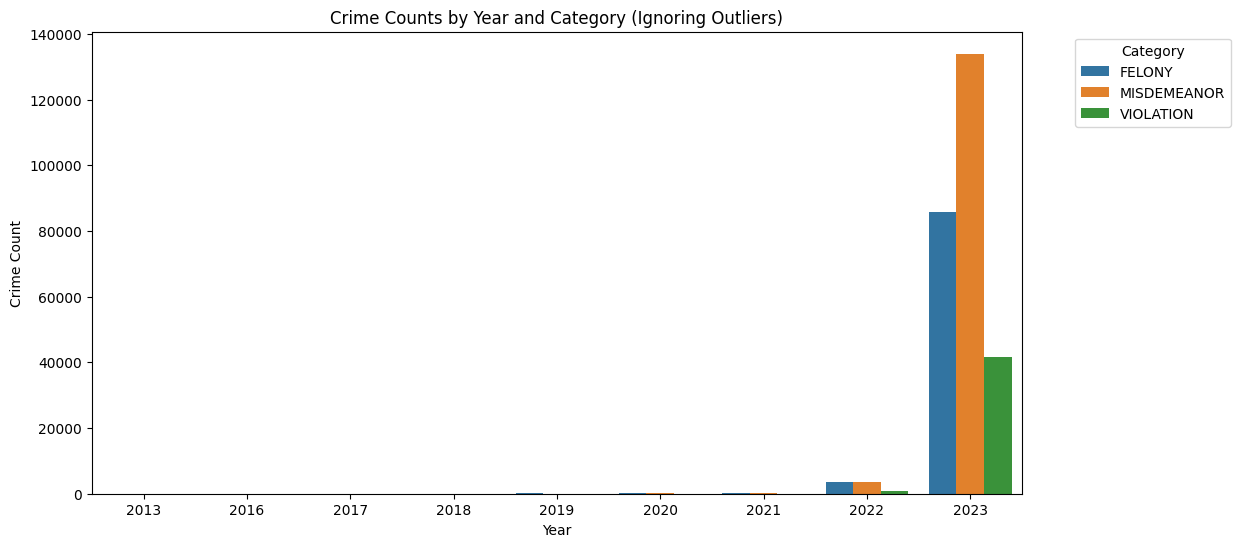

In [ ]:
# If your 'DATE' column is not already in datetime format, convert it using:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce', format='%m/%d/%Y')

# Drop rows with NaT (Not a Time) values
df = df.dropna(subset=['DATE'])

# Extract year from the date
df['YEAR'] = df['DATE'].dt.year

# Create a DataFrame with crime counts by year and category
crime_counts = df.groupby(['YEAR', 'CATEGORY']).size().reset_index(name='Crime_Count')

# Set a threshold for the minimum crime count
min_crime_count_threshold = 25

# Filter out data for counts greater than the threshold
filtered_data = crime_counts[crime_counts['Crime_Count'] > min_crime_count_threshold]

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='Crime_Count', hue='CATEGORY', data=filtered_data)
plt.title('Crime Counts by Year and Category (Ignoring Outliers)')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


Visualization of Crime Occurrences by Location

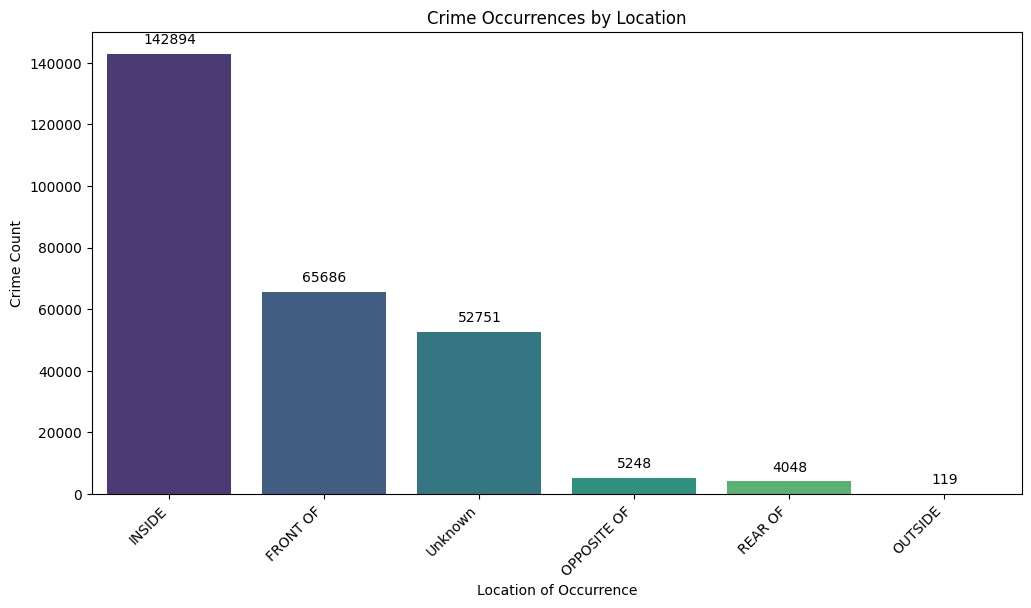

In [ ]:
# Replace '(null)' values with 'Unknown' for better visualization
df['LOCATION OF OCCURANCE'] = df['LOCATION OF OCCURANCE'].replace('(null)', 'Unknown')

# Count occurrences of each location
location_counts = df['LOCATION OF OCCURANCE'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Crime Occurrences by Location')
plt.xlabel('Location of Occurrence')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


Top 10 Crime Occurrences by Offense Description

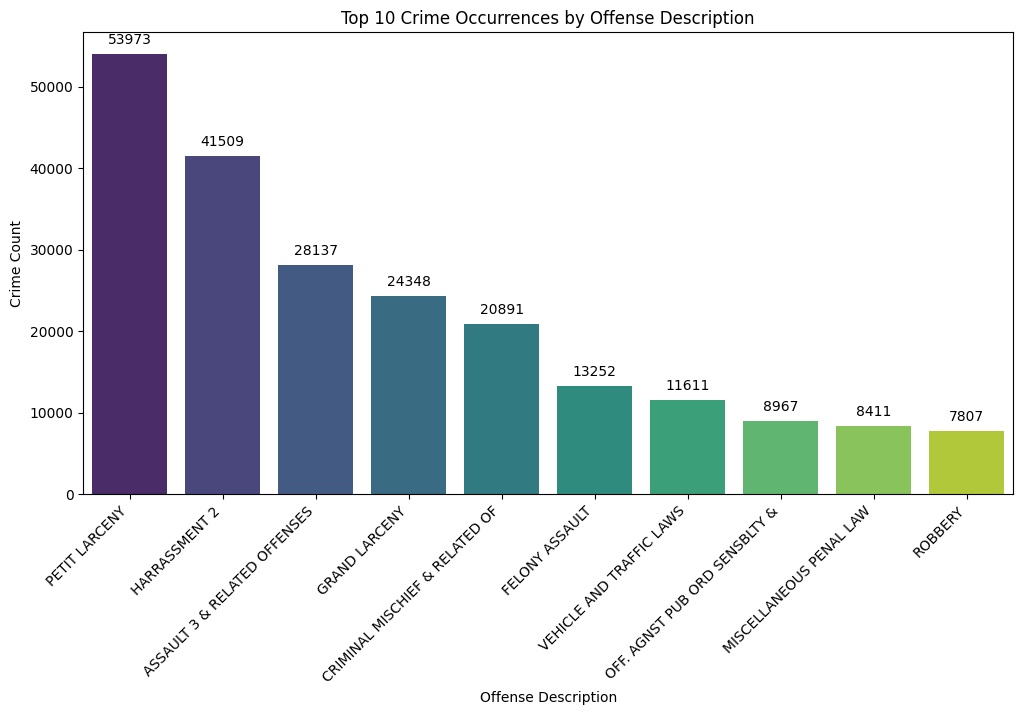

In [ ]:
offense_counts = df['OFFENCE DESCRIPTION'].value_counts()

top_n = 10  # Set the number of top offenses to display
top_offense_counts = offense_counts.head(top_n)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_offense_counts.index, y=top_offense_counts.values, palette='viridis')
plt.title(f'Top {top_n} Crime Occurrences by Offense Description')
plt.xlabel('Offense Description')
plt.ylabel('Crime Count')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Word Cloud of Crime Offense Descriptions

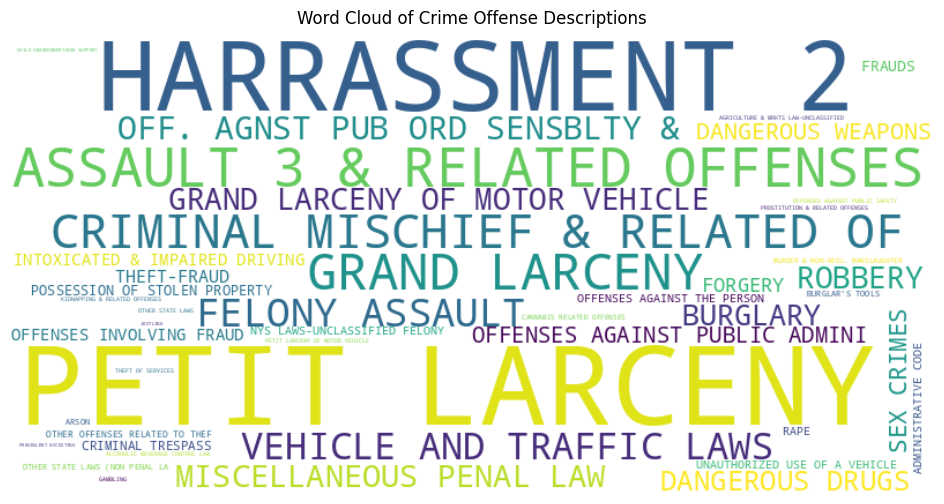

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(offense_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Crime Offense Descriptions')
plt.show()


Counts of Suspect Age Groups in Crime Dataset

In [ ]:
age_group_counts = df['SUSPECT AGE GROUP'].value_counts()
print(age_group_counts)

UNKNOWN    103658
25-44       75922
(null)      36375
45-64       26079
18-24       19826
<18          6029
65           2801
1022           25
1023           15
2023            9
942             1
938             1
929             1
-963            1
-5              1
-953            1
925             1
Name: SUSPECT AGE GROUP, dtype: int64


Distribution of Crime Occurrences by Suspect Age Group

In [ ]:
# Values to remove from 'SUSPECT AGE GROUP'
values_to_remove = ['1022', '1023', '2023', '942', '938', '929', '-963', '-5', '-953', '925']

# Replace specified values with 'UNKNOWN'
df['SUSPECT AGE GROUP'] = df['SUSPECT AGE GROUP'].replace(values_to_remove, 'UNKNOWN')

# Replace null values with 'UNKNOWN'
df['SUSPECT AGE GROUP'] = df['SUSPECT AGE GROUP'].fillna('UNKNOWN')

# Replace '(null)' values with 'UNKNOWN'
df['SUSPECT AGE GROUP'] = df['SUSPECT AGE GROUP'].replace('(null)', 'UNKNOWN')

# Combine 'UNKNOWN' and specified values into a single category
df['SUSPECT AGE GROUP'] = df['SUSPECT AGE GROUP'].str.upper()

# Count occurrences of each suspect age group
age_group_counts = df['SUSPECT AGE GROUP'].value_counts().reset_index()

# Define the groups you want
specified_values = ['UNKNOWN', '1022', '1023', '2023', '942', '938', '929', '-963', '-5', '-953', '925']

# Create a new column 'Group' based on the values
age_group_counts['Group'] = age_group_counts['index'].apply(lambda x: 'Group: UNKNOWN' if x in ['UNKNOWN', '(NULL)'] else 'Group: SPECIFIED' if x in specified_values else x)

# Aggregate counts based on the new 'Group' column
grouped_counts = age_group_counts.groupby('Group')['SUSPECT AGE GROUP'].sum().reset_index()

# Create pie chart using Plotly
fig = px.pie(grouped_counts, names='Group', values='SUSPECT AGE GROUP',
             title='Distribution of Crime Occurrences by Suspect Age Group',
             labels={'Group': 'Suspect Age Group', 'SUSPECT AGE GROUP': 'Crime Count'},
             hole=0.4,
             color_discrete_sequence=px.colors.qualitative.Set1)

# Show the interactive plot
fig.show()


In [32]:
# Replace '(null)' values with 'Unknown'
df['PREMISE TYPE'] = df['PREMISE TYPE'].replace('(null)', 'Unknown')

# Count occurrences of each premise type
premise_counts = df['PREMISE TYPE'].value_counts().reset_index()

# Select the top 15 categories
top_15_premises = premise_counts.head(15)

# Calculate percentage
top_15_premises['Percentage'] = (top_15_premises['PREMISE TYPE'] / top_15_premises['PREMISE TYPE'].sum()) * 100

# Round off percentage values
top_15_premises['Percentage'] = top_15_premises['Percentage'].round(2)

# Create bar chart using Plotly
fig = px.bar(top_15_premises, x='index', y='PREMISE TYPE',
             title='Top 15 Crime Occurrences by Premise Type',
             labels={'index': 'Premise Type', 'PREMISE TYPE': 'Crime Count'},
             text='Percentage',
             color_discrete_sequence=px.colors.qualitative.Set2)

# Rotate x-axis labels for better visibility
fig.update_layout(xaxis=dict(tickangle=45))

# Show the interactive plot
fig.show()


<ipython-input-32-def05f3b52c6>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-def05f3b52c6>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Suspect Race Distribution

In [38]:
race_counts = df['SUSPECT RACE'].value_counts()
print(race_counts)

BLACK                             81596
UNKNOWN                           72142
WHITE HISPANIC                    39163
Unknown                           36375
WHITE                             19841
BLACK HISPANIC                    12711
ASIAN / PACIFIC ISLANDER           8381
AMERICAN INDIAN/ALASKAN NATIVE      537
Name: SUSPECT RACE, dtype: int64


In [39]:
#Replace (null) with UNKNOWN
df['SUSPECT RACE'] = df['SUSPECT RACE'].replace('Unknown', 'UNKNOWN')

# Display the count of each unique value in the 'SUSPECT RACE' column
race_counts = df['SUSPECT RACE'].value_counts()
print(race_counts)

UNKNOWN                           108517
BLACK                              81596
WHITE HISPANIC                     39163
WHITE                              19841
BLACK HISPANIC                     12711
ASIAN / PACIFIC ISLANDER            8381
AMERICAN INDIAN/ALASKAN NATIVE       537
Name: SUSPECT RACE, dtype: int64


Suspect Sex Distribution

In [35]:
# Display the count of each unique value in the 'SUSPECT RACE' column
sex_counts = df['SUSPECT SEX'].value_counts()
print(sex_counts)

M          136195
U           60914
F           37262
Unknown     36375
Name: SUSPECT SEX, dtype: int64


In [40]:
#Replace (null) with UNKNOWN
df['SUSPECT SEX'] = df['SUSPECT SEX'].replace('Unknown', 'U')

# Display the count of each unique value in the 'SUSPECT RACE' column
sex_counts = df['SUSPECT SEX'].value_counts()
print(sex_counts)

M    136195
U     97289
F     37262
Name: SUSPECT SEX, dtype: int64


Crime Occurrences by Suspect Race and Sex

In [42]:
# Count occurrences of each suspect race and sex
suspect_counts = df.groupby(['SUSPECT RACE', 'SUSPECT SEX']).size().reset_index(name='Crime_Count')

# Create a bar chart using Plotly Express
fig = px.bar(suspect_counts, x='SUSPECT RACE', y='Crime_Count',
             color='SUSPECT SEX',
             title='Crime Occurrences by Suspect Race and Sex',
             labels={'SUSPECT RACE': 'Suspect Race', 'Crime_Count': 'Crime Count'},
             height=500)

# Show the interactive plot
fig.show()


In [43]:
# Display the count of each unique value in the 'SUSPECT RACE' column
victim_age_counts = df['VICTIM AGE GROUP'].value_counts()
print(victim_age_counts)

25-44      94717
UNKNOWN    79000
45-64      50012
18-24      21835
65         13826
<18        11338
-2             2
1022           2
-970           1
-929           1
-961           1
-964           1
-10            1
1023           1
-3             1
-6             1
-968           1
949            1
-33            1
1018           1
-30            1
953            1
Name: VICTIM AGE GROUP, dtype: int64


Victim Age Group Distribution

In [45]:
# List of values to be replaced with 'UNKNOWN'
values_to_replace = ['-2', '1022', '-970', '-929', '-961', '-964', '-10', '1023', '-3', '-6', '-968', '949', '-33', '1018', '-30', '953']

# Replace the specified values with 'UNKNOWN'
df['VICTIM AGE GROUP'] = df['VICTIM AGE GROUP'].replace(values_to_replace, 'UNKNOWN')

# Display the count of each unique value in the 'VICTIM AGE GROUP' column
victim_age_counts = df['VICTIM AGE GROUP'].value_counts()
print(victim_age_counts)

25-44      94717
UNKNOWN    79018
45-64      50012
18-24      21835
65         13826
<18        11338
Name: VICTIM AGE GROUP, dtype: int64


In [46]:
# Create a DataFrame from the series
victim_age_df = pd.DataFrame({'Age Group': victim_age_counts.index, 'Count': victim_age_counts.values})

# Plotly pie chart
fig = px.pie(victim_age_df, values='Count', names='Age Group',
             title='Victim Age Group Distribution',
             labels={'Count': 'Percentage'},
             hover_data=['Count'],
             hole=0.1,  # Set the size of the center hole
             )

# Customize the layout
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0, 0, 0, 0],
                  marker=dict(line=dict(color='white', width=2)))

# Show the plot
fig.show()

In [47]:
victim_race_counts = df['VICTIM RACE'].value_counts()
print(victim_race_counts)

UNKNOWN                           85286
BLACK                             65123
WHITE HISPANIC                    48437
WHITE                             38188
ASIAN / PACIFIC ISLANDER          20937
BLACK HISPANIC                    11611
AMERICAN INDIAN/ALASKAN NATIVE     1115
(null)                               49
Name: VICTIM RACE, dtype: int64


In [48]:
#Replace (null) with UNKNOWN
df['VICTIM RACE'] = df['VICTIM RACE'].replace('(null)', 'UNKNOWN')

# Display the count of each unique value in the 'SUSPECT RACE' column
victim_race_counts = df['VICTIM RACE'].value_counts()
print(victim_race_counts)

UNKNOWN                           85335
BLACK                             65123
WHITE HISPANIC                    48437
WHITE                             38188
ASIAN / PACIFIC ISLANDER          20937
BLACK HISPANIC                    11611
AMERICAN INDIAN/ALASKAN NATIVE     1115
Name: VICTIM RACE, dtype: int64


In [49]:
# Display the count of each unique value in the 'VICTIM RACE' column
victim_sex_counts = df['VICTIM SEX'].value_counts()
print(victim_sex_counts)

F    102777
M     92292
D     43855
E     29850
L      1972
Name: VICTIM SEX, dtype: int64


In [50]:
# Count occurrences of each VICTIM race and sex
victim_counts = df.groupby(['VICTIM RACE', 'VICTIM SEX']).size().reset_index(name='Crime_Count')

# Create a bar chart using Plotly Express
fig = px.bar(victim_counts, x='VICTIM RACE', y='Crime_Count',
             color='VICTIM SEX',
             title='Crime Occurrences by Victim Race and Sex',
             labels={'VICTIM RACE': 'VICTIM Race', 'Crime_Count': 'Crime Count'},
             height=500)

# Show the interactive plot
fig.show()

In [51]:
# Create a new DataFrame with two columns 'LATITUDE' and 'LONGITUDE'
df[['LATITUDE', 'LONGITUDE']] = df['LATITUDE, LONGITUDE'].str.strip('()').str.split(', ', expand=True).astype(float)

In [52]:
df.head()

,BORO_NAME,DATE,TIME,CATEGORY,LOCATION OF OCCURANCE,OFFENCE DESCRIPTION,PREMISE TYPE,SUSPECT AGE GROUP,SUSPECT RACE,SUSPECT SEX,VICTIM AGE GROUP,VICTIM RACE,VICTIM SEX,"LATITUDE, LONGITUDE",YEAR,LATITUDE,LONGITUDE
0,BRONX,2023-03-04,12:55:00,FELONY,INSIDE,ROBBERY,BANK,UNKNOWN,BLACK,M,18-24,WHITE HISPANIC,M,"(40.822882, -73.848929)",2023,40.822882,-73.848929
1,STATEN ISLAND,2023-05-19,15:52:00,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,Unknown,<18,BLACK,M,<18,BLACK,M,NaN,2023,NaN,NaN
2,BRONX,2023-06-24,14:35:00,VIOLATION,INSIDE,HARRASSMENT 2,Unknown,25-44,BLACK,M,45-64,BLACK,F,"(40.8673, -73.903374)",2023,40.867300,-73.903374
3,MANHATTAN,2022-04-01,15:00:00,MISDEMEANOR,INSIDE,PETIT LARCENY,OTHER,25-44,ASIAN / PACIFIC ISLANDER,M,UNKNOWN,UNKNOWN,E,"(40.815904, -73.945123)",2022,40.815904,-73.945123
4,MANHATTAN,2022-12-29,00:00:00,MISDEMEANOR,INSIDE,OFF. AGNST PUB ORD SENSBLTY &,RESIDENCE - APT. HOUSE,18-24,BLACK,M,18-24,BLACK HISPANIC,F,"(40.826268, -73.943126)",2022,40.826268,-73.943126


Crime Distribution Map

In [ ]:
# Group by latitude and longitude to get the count of crimes at each location
crime_counts = df.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='Crime Count')

# Create an interactive map using Plotly Express
fig = px.scatter_mapbox(crime_counts,
                        lat='LATITUDE',
                        lon='LONGITUDE',
                        size='Crime Count',
                        color='Crime Count',
                        size_max=30,
                        zoom=10,
                        mapbox_style='carto-positron',
                        title='Crime Map with Crime Counts')

# Show the map
fig.show()


In [54]:
from geopy.geocoders import Nominatim

Top 25 Crime Locations with City, State on Interactive Map

In [55]:
# Group by latitude and longitude to get the count of crimes at each location
crime_counts = df.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='Crime Count')

# Sort the DataFrame by the crime count in descending order
crime_counts = crime_counts.sort_values(by='Crime Count', ascending=False)

# Select the top 25 locations
top_25_locations = crime_counts.head(25)

# Create a geocoder object
geolocator = Nominatim(user_agent="crime_map")

# Function to get city and state from latitude and longitude
def get_city_state(lat, lon):
    location = geolocator.reverse((lat, lon), language='en')
    if location:
        address = location.raw.get('address', {})
        city = address.get('city', '')
        state = address.get('state', '')
        return f"{city}, {state}" if city and state else "Unknown"
    else:
        return "Unknown"

# Apply the function to get city and state for the top 25 locations
top_25_locations['City State'] = top_25_locations.apply(lambda row: get_city_state(row['LATITUDE'], row['LONGITUDE']), axis=1)

# Create an interactive map using Plotly Express
fig = px.scatter_mapbox(top_25_locations,
                        lat='LATITUDE',
                        lon='LONGITUDE',
                        size='Crime Count',
                        color='Crime Count',
                        size_max=30,
                        zoom=10,
                        mapbox_style='carto-positron',
                        title='Top 25 Crime Locations with City, State',
                        hover_data={'City State': True, 'Crime Count': True})

# Show the map
fig.show()

<ipython-input-55-a72d30a39162>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Saving Dataframe for creating Tableau Dashbaard
df.to_csv('crime_data.csv', index=False)